In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('malignant_train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_test=pd.read_csv('malignant_test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


AxesSubplot(0.125,0.125;0.62x0.755)


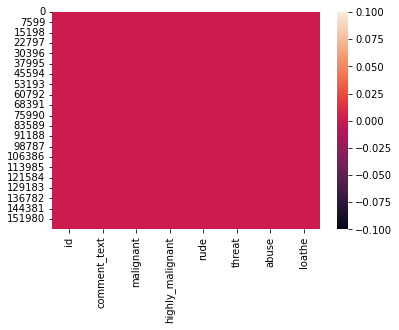

In [26]:
print(sns.heatmap(df.isnull()))

In [28]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null data in train dataset

AxesSubplot(0.125,0.125;0.62x0.755)


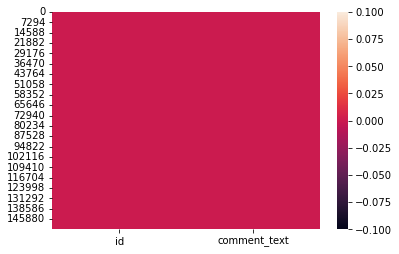

In [27]:
print(sns.heatmap(df_test.isnull()))

In [19]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

Also there is no null values in test dataset

In [8]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [9]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [10]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [11]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [13]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


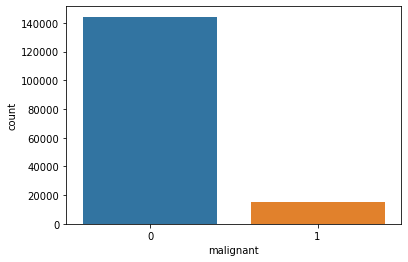

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


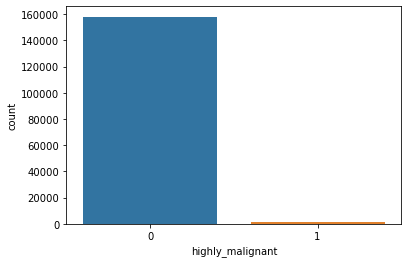

rude


0    151122
1      8449
Name: rude, dtype: int64


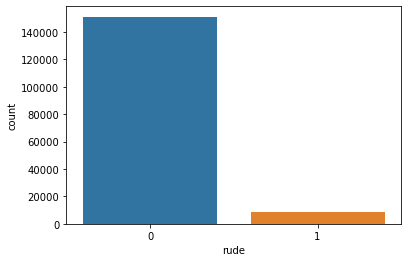

threat


0    159093
1       478
Name: threat, dtype: int64


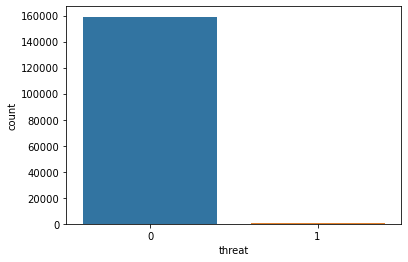

abuse


0    151694
1      7877
Name: abuse, dtype: int64


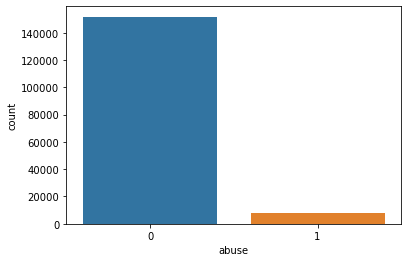

loathe


0    158166
1      1405
Name: loathe, dtype: int64


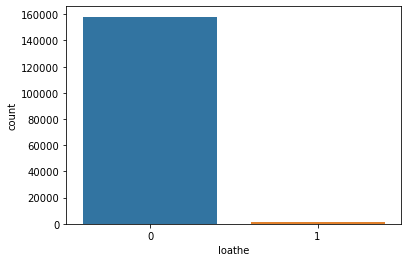

In [30]:
cols=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in cols:
    print(i)
    print('\n')
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [14]:
df.shape

(159571, 8)

There are 1,59,571 records and 8 columns

# Feature Engineering

In [15]:
df_distribution=df.iloc[:,2:].sum()

In [17]:
type(df_distribution)

pandas.core.series.Series

In [21]:
df_distribution

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

<AxesSubplot:ylabel='None'>

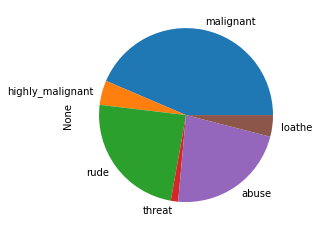

In [24]:
df_distribution.plot.pie(y=df_distribution.values,x=df_distribution.index)

We can observe that almost 43% comments are Malignant, 40% are rude and abuse eqauly distributed.  14% are Highly malignant and loathe  which is also equaly distributed. Very few comes under threat

In [31]:
df['length']=df['comment_text'].str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


Created a new feature using the length of common text feature

# Text Processing 

In [33]:
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer

In [36]:
# text processing of comment_text column
#convert all messages to lower case
df['comment_text']=df['comment_text'].str.lower()

# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webadress'
df['comment_text']=df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money sybbols with 'moneysymbol'
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [37]:
#adding more string in stop_words
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [38]:
# removing the stopwords from comment_text column
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [39]:
# lemmatizing the comment_text, stemming is not preferable
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [41]:
df['clean_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,""" can't make real suggestion improvement - won...",0,0,0,0,0,0,622,405
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [43]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62893130
Clean Length 43858566


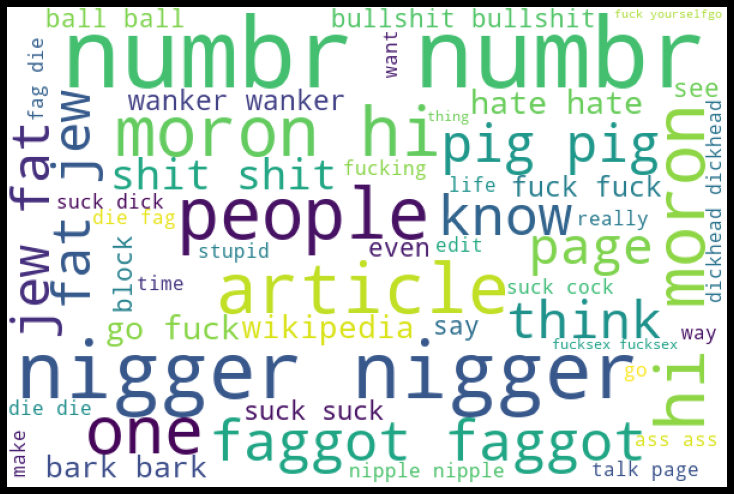

In [45]:
#Getting sense of word Cloud which are malignant
from wordcloud import WordCloud
hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

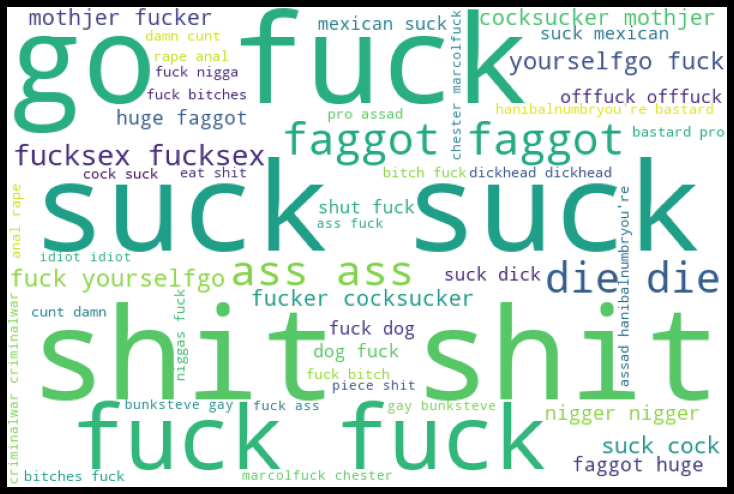

In [46]:
#Getting sense of word Cloud which are highly malignant
from wordcloud import WordCloud
hams = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

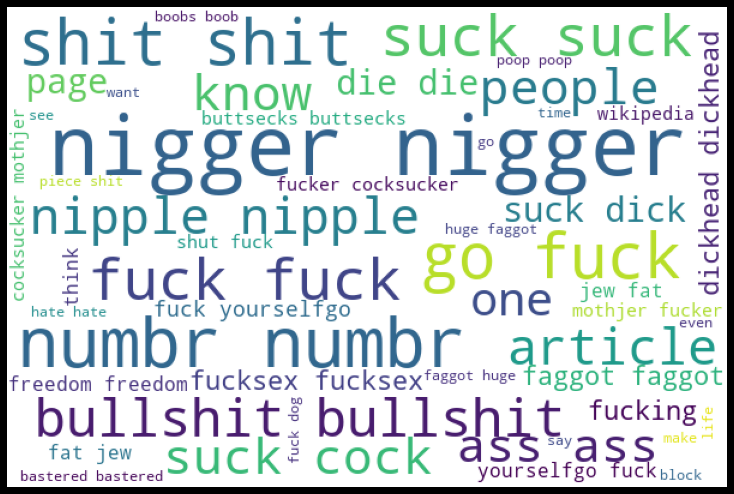

In [47]:
#Getting sense of word Cloud which are rude
from wordcloud import WordCloud
hams = df['comment_text'][df['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

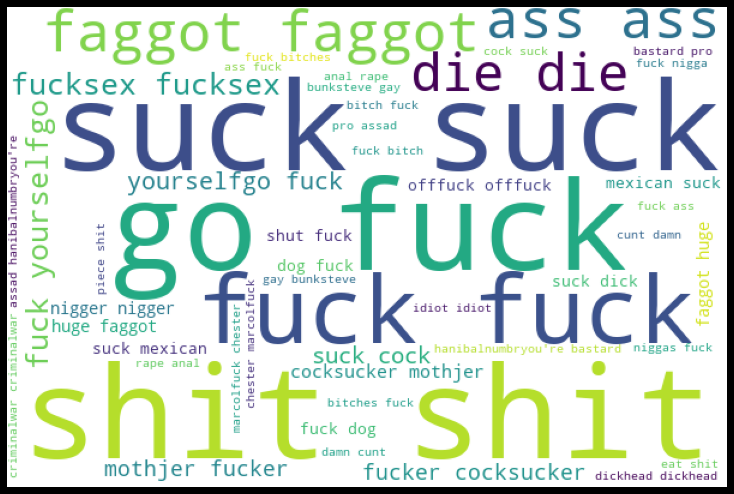

In [48]:
#Getting sense of word Cloud which are threat
from wordcloud import WordCloud
hams = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

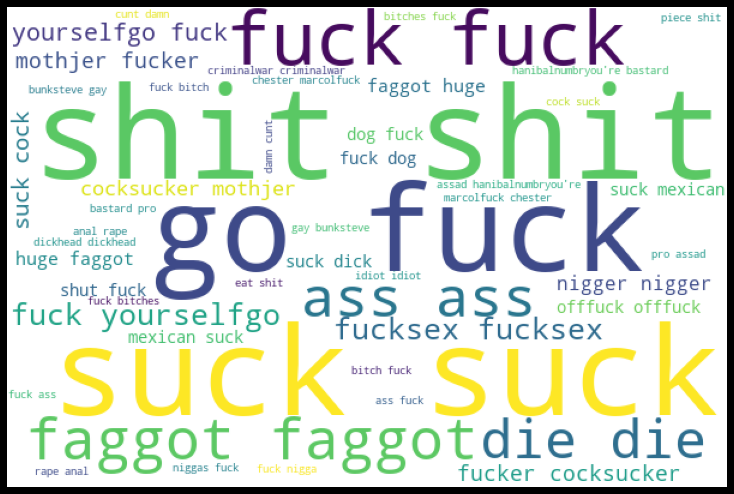

In [49]:
#Getting sense of word Cloud which are abuse
from wordcloud import WordCloud
hams = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

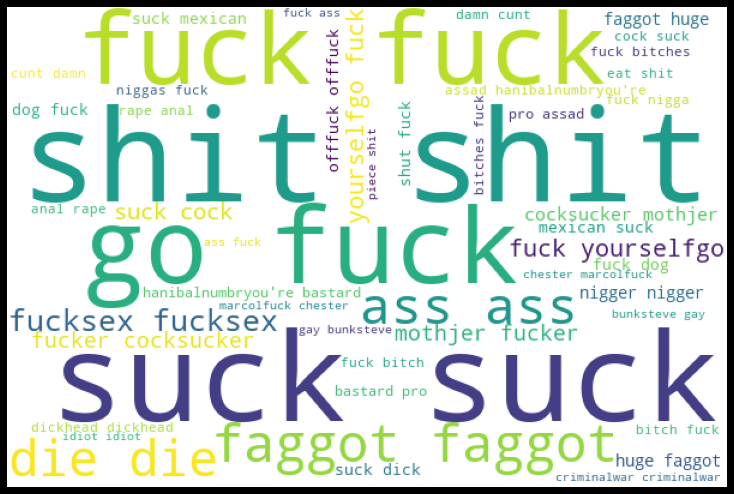

In [50]:
#Getting sense of word Cloud which are loathe
from wordcloud import WordCloud
hams = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

tfidf= TfidfVectorizer(analyzer='word',max_features=5000)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   length            159571 non-null  int64 
 9   clean_length      159571 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 12.2+ MB


In [62]:
#separating the target features
y=df.drop(columns=['id','comment_text','length','clean_length'])


In [63]:
x=tfidf.fit_transform(df.comment_text)

In [64]:
x.shape,y.shape

((159571, 5000), (159571, 6))